<a href="https://colab.research.google.com/github/kammasaimanasa/Enchanted-wings-marvels-of-butterfly-species-/blob/main/Butterfly_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [62]:
!ls '/content/drive/MyDrive/archive (1)'


'butterflies and moths.csv'		     test    training.csv.csv
'EfficientNetB0-100-(224 X 224)- 97.59.h5'   train   valid


In [63]:
df = pd.read_csv("/content/drive/MyDrive/archive (1)/butterflies and moths.csv")

In [64]:
print(df)

       class id                    filepaths           labels data set
0             0         train/ADONIS/001.jpg           ADONIS    train
1             0         train/ADONIS/002.jpg           ADONIS    train
2             0         train/ADONIS/003.jpg           ADONIS    train
3             0         train/ADONIS/004.jpg           ADONIS    train
4             0         train/ADONIS/005.jpg           ADONIS    train
...         ...                          ...              ...      ...
13589        99  valid/ZEBRA LONG WING/1.jpg  ZEBRA LONG WING    valid
13590        99  valid/ZEBRA LONG WING/2.jpg  ZEBRA LONG WING    valid
13591        99  valid/ZEBRA LONG WING/3.jpg  ZEBRA LONG WING    valid
13592        99  valid/ZEBRA LONG WING/4.jpg  ZEBRA LONG WING    valid
13593        99  valid/ZEBRA LONG WING/5.jpg  ZEBRA LONG WING    valid

[13594 rows x 4 columns]


In [65]:
df.head()

class id             filepaths  labels data set
0         0  train/ADONIS/001.jpg  ADONIS    train
1         0  train/ADONIS/002.jpg  ADONIS    train
2         0  train/ADONIS/003.jpg  ADONIS    train
3         0  train/ADONIS/004.jpg  ADONIS    train
4         0  train/ADONIS/005.jpg  ADONIS    train

In [66]:
df.tail()

class id                    filepaths           labels data set
13589        99  valid/ZEBRA LONG WING/1.jpg  ZEBRA LONG WING    valid
13590        99  valid/ZEBRA LONG WING/2.jpg  ZEBRA LONG WING    valid
13591        99  valid/ZEBRA LONG WING/3.jpg  ZEBRA LONG WING    valid
13592        99  valid/ZEBRA LONG WING/4.jpg  ZEBRA LONG WING    valid
13593        99  valid/ZEBRA LONG WING/5.jpg  ZEBRA LONG WING    valid

In [67]:
df_train = pd.read_csv("/content/drive/MyDrive/archive (1)/training.csv.csv")
df_train.head()

Epoch      loss  accuracy  F1_score  val_loss  val_accuracy  val_F1_score
0      1  5.226210   0.75290  0.665162  2.001779         0.938      0.929245
1      2  1.435009   0.94665  0.912901  0.975209         0.954      0.947070
2      3  0.857355   0.97130  0.956363  0.765548         0.960      0.953881
3      4  0.655860   0.98345  0.976639  0.679098         0.958      0.956769
4      5  0.539441   0.99065  0.986101  0.623349         0.954      0.954769

In [68]:
train_images = os.listdir('/content/drive/MyDrive/archive (1)/train')
print(train_images[:5])

['WOOD SATYR', 'WHITE LINED SPHINX MOTH', 'VICEROY', 'TROPICAL LEAFWING', 'STRAITED QUEEN']


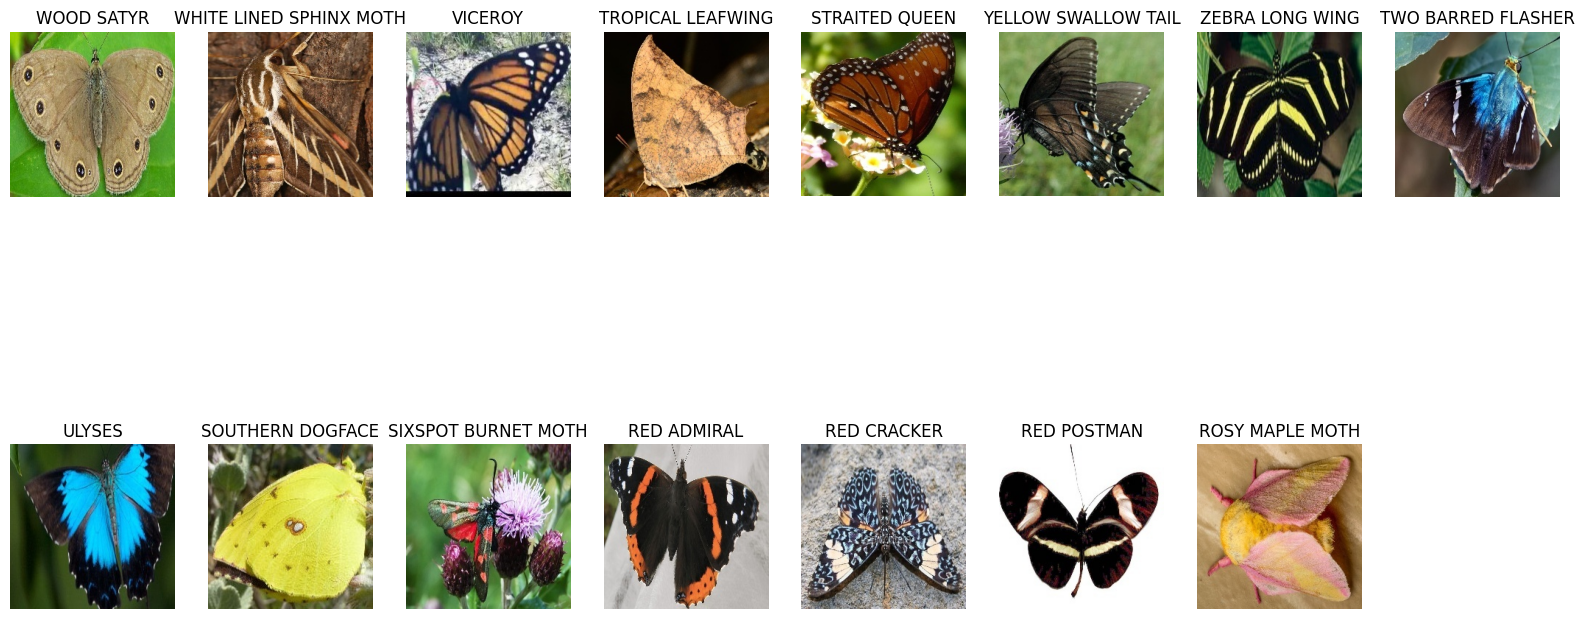

In [69]:
import matplotlib.image as mpimg
import random

base_path = '/content/drive/MyDrive/archive (1)/train'

categories = os.listdir(base_path)

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        random.shuffle(images)
        for img in images[:1]:
            image_paths.append(os.path.join(category_path, img))
            labels.append(category)
        if len(image_paths) >= 40:
            break

plt.figure(figsize=(20, 25))
for i in range(15):
    img = mpimg.imread(image_paths[i])
    plt.subplot(5, 8, i + 1)
    plt.imshow(img)
    plt.title(labels[i], fontsize=12, wrap=True)
    plt.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [70]:
!ls -1 "/content/drive/MyDrive/archive (1)/train"


ADONIS
'AFRICAN GIANT SWALLOWTAIL'
'AMERICAN SNOOT'
'AN 88'
APPOLLO
'ARCIGERA FLOWER MOTH'
ATALA
'ATLAS MOTH'
'BANDED ORANGE HELICONIAN'
'BANDED PEACOCK'
'BANDED TIGER MOTH'
'BECKERS WHITE'
'BIRD CHERRY ERMINE MOTH'
'BLACK HAIRSTREAK'
'BLUE MORPHO'
'BLUE SPOTTED CROW'
'BROOKES BIRDWING'
'BROWN ARGUS'
'BROWN SIPROETA'
'CABBAGE WHITE'
'CAIRNS BIRDWING'
'CHALK HILL BLUE'
'CHECQUERED SKIPPER'
CHESTNUT
'CINNABAR MOTH'
'CLEARWING MOTH'
CLEOPATRA
'CLODIUS PARNASSIAN'
'CLOUDED SULPHUR'
'COMET MOTH'
'COMMON BANDED AWL'
'COMMON WOOD-NYMPH'
'COPPER TAIL'
CRECENT
'CRIMSON PATCH'
'DANAID EGGFLY'
'EASTERN COMA'
'EASTERN DAPPLE WHITE'
'EASTERN PINE ELFIN'
'ELBOWED PIERROT'
'EMPEROR GUM MOTH'
'GARDEN TIGER MOTH'
'GIANT LEOPARD MOTH'
'GLITTERING SAPPHIRE'
'GOLD BANDED'
'GREAT EGGFLY'
'GREAT JAY'
'GREEN CELLED CATTLEHEART'
'GREEN HAIRSTREAK'
'GREY HAIRSTREAK'
'HERCULES MOTH'
'HUMMING BIRD HAWK MOTH'
'INDRA SWALLOW'
'IO MOTH'
'Iphiclus sister'
JULIA
'LARGE MARBLE'
'LUNA MOTH'
'MADAGASCAN SUNSET MOTH'
MAL

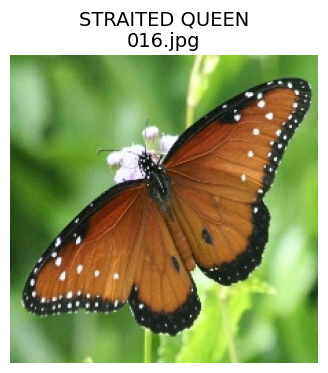

In [71]:
category_path = "/content/drive/MyDrive/archive (1)/train/STRAITED QUEEN"

images = os.listdir(category_path)

image_file = random.choice(images)
image_path = os.path.join(category_path, image_file)

img = mpimg.imread(image_path)
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"STRAITED QUEEN\n{image_file}", fontsize=14)
plt.axis('off')
plt.show()


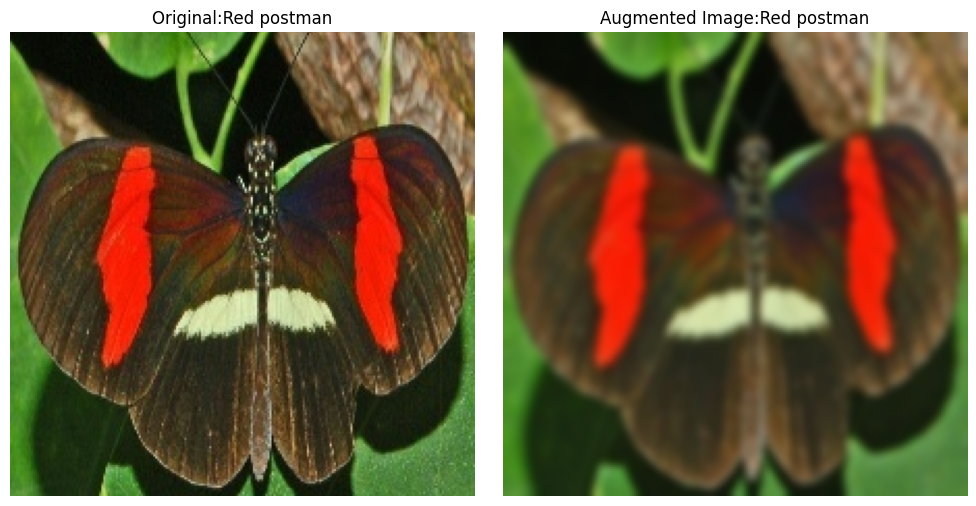

In [72]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import random

category_path = "/content/drive/MyDrive/archive (1)/train/RED POSTMAN"

images = os.listdir(category_path)
image_file = random.choice(images)
image_path = os.path.join(category_path, image_file)

original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

blurred_img = cv2.GaussianBlur(original_img, (9, 9), 2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original:Red postman", fontsize=12)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img)
plt.title("Augmented Image:Red postman", fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()


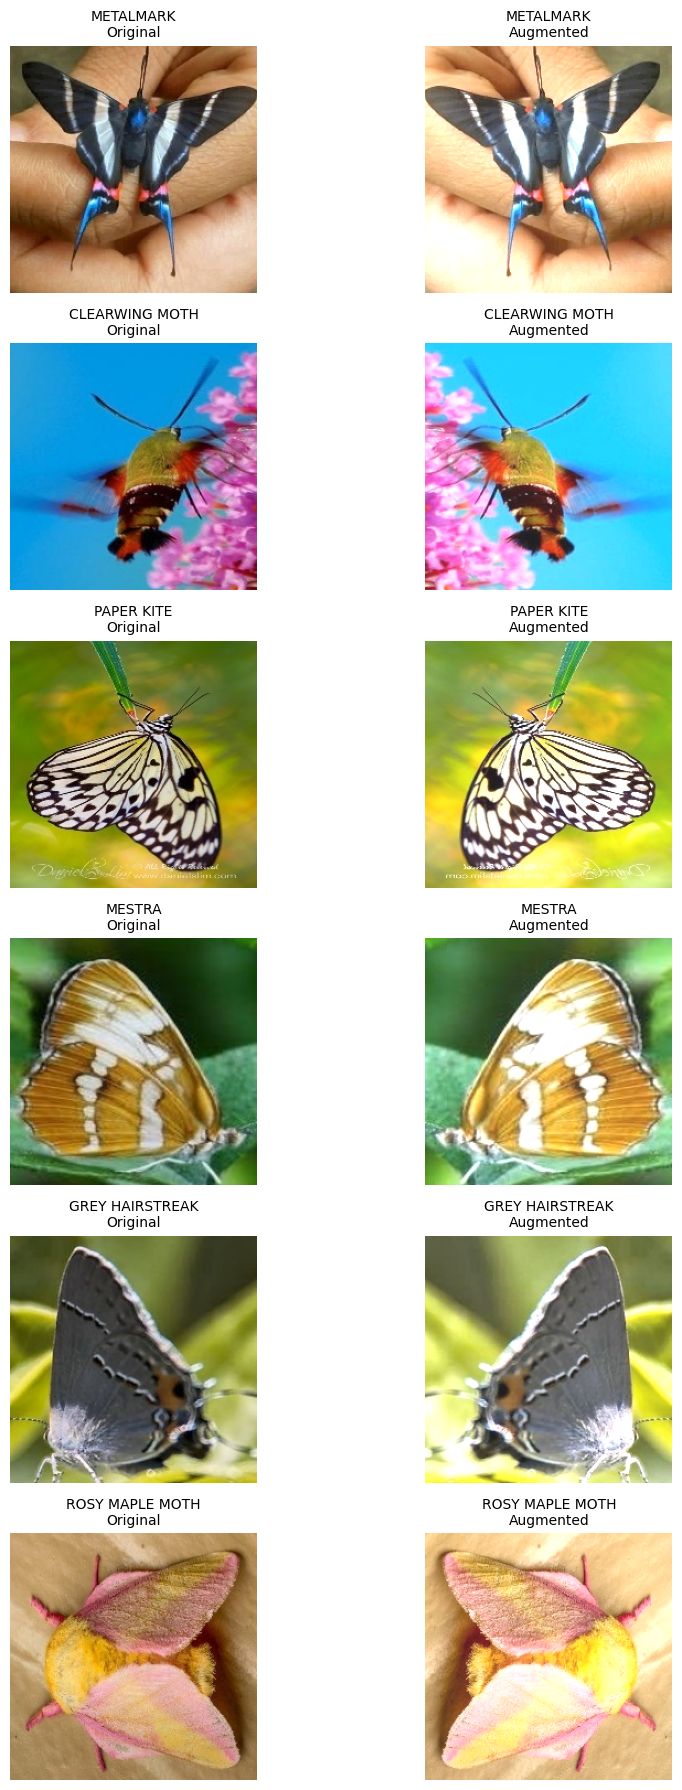

In [73]:
import cv2

base_path = "/content/drive/MyDrive/archive (1)/train"

categories = os.listdir(base_path)
categories = [c for c in categories if os.path.isdir(os.path.join(base_path, c))]

selected_categories = random.sample(categories, 6)

images = []
titles = []

for category in selected_categories:
    category_path = os.path.join(base_path, category)
    files = os.listdir(category_path)

    if not files:
        continue

    img_path = os.path.join(category_path, random.choice(files))

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    flipped = cv2.flip(img, 1)
    augmented = cv2.convertScaleAbs(flipped, alpha=1.2, beta=30)

    images.extend([img, augmented])
    titles.extend([f"{category}\nOriginal", f"{category}\nAugmented"])

plt.figure(figsize=(10, 18))

for i in range(12):
    plt.subplot(6, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [74]:
train_dir = '/content/drive/MyDrive/archive (1)/train'
valid_dir = '/content/drive/MyDrive/archive (1)/valid'
test_dir  = '/content/drive/MyDrive/archive (1)/test'


In [75]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 12604 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [76]:
class_names = list(train_generator.class_indices.keys())

for name in class_names:
    print(name)

ADONIS
AFRICAN GIANT SWALLOWTAIL
AMERICAN SNOOT
AN 88
APPOLLO
ARCIGERA FLOWER MOTH
ATALA
ATLAS MOTH
BANDED ORANGE HELICONIAN
BANDED PEACOCK
BANDED TIGER MOTH
BECKERS WHITE
BIRD CHERRY ERMINE MOTH
BLACK HAIRSTREAK
BLUE MORPHO
BLUE SPOTTED CROW
BROOKES BIRDWING
BROWN ARGUS
BROWN SIPROETA
CABBAGE WHITE
CAIRNS BIRDWING
CHALK HILL BLUE
CHECQUERED SKIPPER
CHESTNUT
CINNABAR MOTH
CLEARWING MOTH
CLEOPATRA
CLODIUS PARNASSIAN
CLOUDED SULPHUR
COMET MOTH
COMMON BANDED AWL
COMMON WOOD-NYMPH
COPPER TAIL
CRECENT
CRIMSON PATCH
DANAID EGGFLY
EASTERN COMA
EASTERN DAPPLE WHITE
EASTERN PINE ELFIN
ELBOWED PIERROT
EMPEROR GUM MOTH
GARDEN TIGER MOTH
GIANT LEOPARD MOTH
GLITTERING SAPPHIRE
GOLD BANDED
GREAT EGGFLY
GREAT JAY
GREEN CELLED CATTLEHEART
GREEN HAIRSTREAK
GREY HAIRSTREAK
HERCULES MOTH
HUMMING BIRD HAWK MOTH
INDRA SWALLOW
IO MOTH
Iphiclus sister
JULIA
LARGE MARBLE
LUNA MOTH
MADAGASCAN SUNSET MOTH
MALACHITE
MANGROVE SKIPPER
MESTRA
METALMARK
MILBERTS TORTOISESHELL
MONARCH
MOURNING CLOAK
OLEANDER HAWK MOT

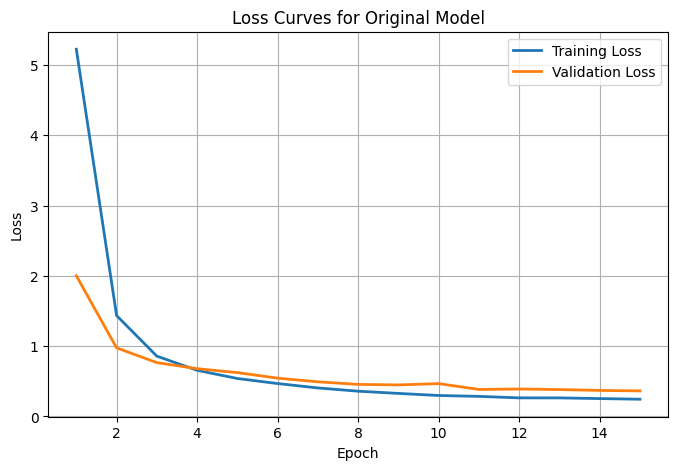

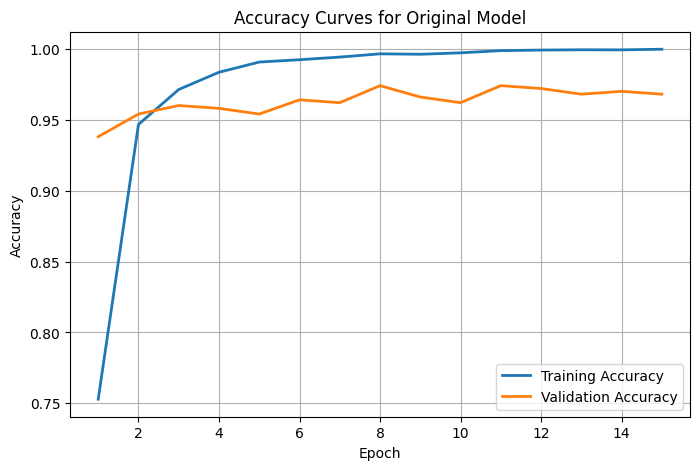

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df_train['Epoch'], df_train['loss'], label='Training Loss', linewidth=2)
plt.plot(df_train['Epoch'], df_train['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Loss Curves for Original Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(df_train['Epoch'], df_train['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(df_train['Epoch'], df_train['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title("Accuracy Curves for Original Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [78]:
best_epoch = df_train['val_accuracy'].idxmax()
best_row = df_train.loc[best_epoch]
print("Best Epoch Based on Validation Accuracy:")
print(best_row)

Best Epoch Based on Validation Accuracy:
Epoch           8.000000
loss            0.358726
accuracy        0.996450
F1_score        0.994503
val_loss        0.455653
val_accuracy    0.974000
val_F1_score    0.970872
Name: 7, dtype: float64


In [79]:
print(f"🔍 Insights into the Best Model (Epoch {int(best_row['Epoch'])}):\n")
print(f" Validation Accuracy: {best_row['val_accuracy']:.4f}")
print(f" Training Accuracy:   {best_row['accuracy']:.4f}")
print(f" Validation Loss:     {best_row['val_loss']:.4f}")
print(f" Training Loss:       {best_row['loss']:.4f}")
print(f" Validation F1 Score: {best_row['val_F1_score']:.4f}")
print(f" Training F1 Score:   {best_row['F1_score']:.4f}")


🔍 Insights into the Best Model (Epoch 8):

 Validation Accuracy: 0.9740
 Training Accuracy:   0.9965
 Validation Loss:     0.4557
 Training Loss:       0.3587
 Validation F1 Score: 0.9709
 Training F1 Score:   0.9945


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/content/drive/MyDrive/archive (1)/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 500 images belonging to 100 classes.


In [81]:
import numpy as np

y_probs = model_1.predict(test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step


In [82]:
y_true = np.array(test_data.classes)
y_true[:50]


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [83]:
y_pred = y_probs.argmax(axis=1)
y_pred[:50]


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
y_probs = model_1.predict(test_data)            # prediction probabilities
y_pred = y_probs.argmax(axis=1)                 # predicted class indices
y_true = np.array(test_data.classes)            # true class labels
class_names = list(test_data.class_indices.keys())  # class labels
cm = confusion_matrix(y_true, y_pred)


16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False):
    """
    Makes a confusion matrix using seaborn heatmap.
    """
    cm = confusion_matrix(y_true, y_pred)

    if norm:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='.2f' if norm else 'd', cmap="Blues",
                xticklabels=classes,
                yticklabels=classes,
                cbar=False,
                annot_kws={"size": text_size})

    plt.xlabel("Predicted Label", fontsize=text_size)
    plt.ylabel("True Label", fontsize=text_size)
    plt.title("Confusion Matrix", fontsize=text_size + 2)
    plt.xticks(rotation=90, fontsize=text_size * 0.7)
    plt.yticks(rotation=0, fontsize=text_size * 0.7)
    plt.tight_layout()
    plt.show()


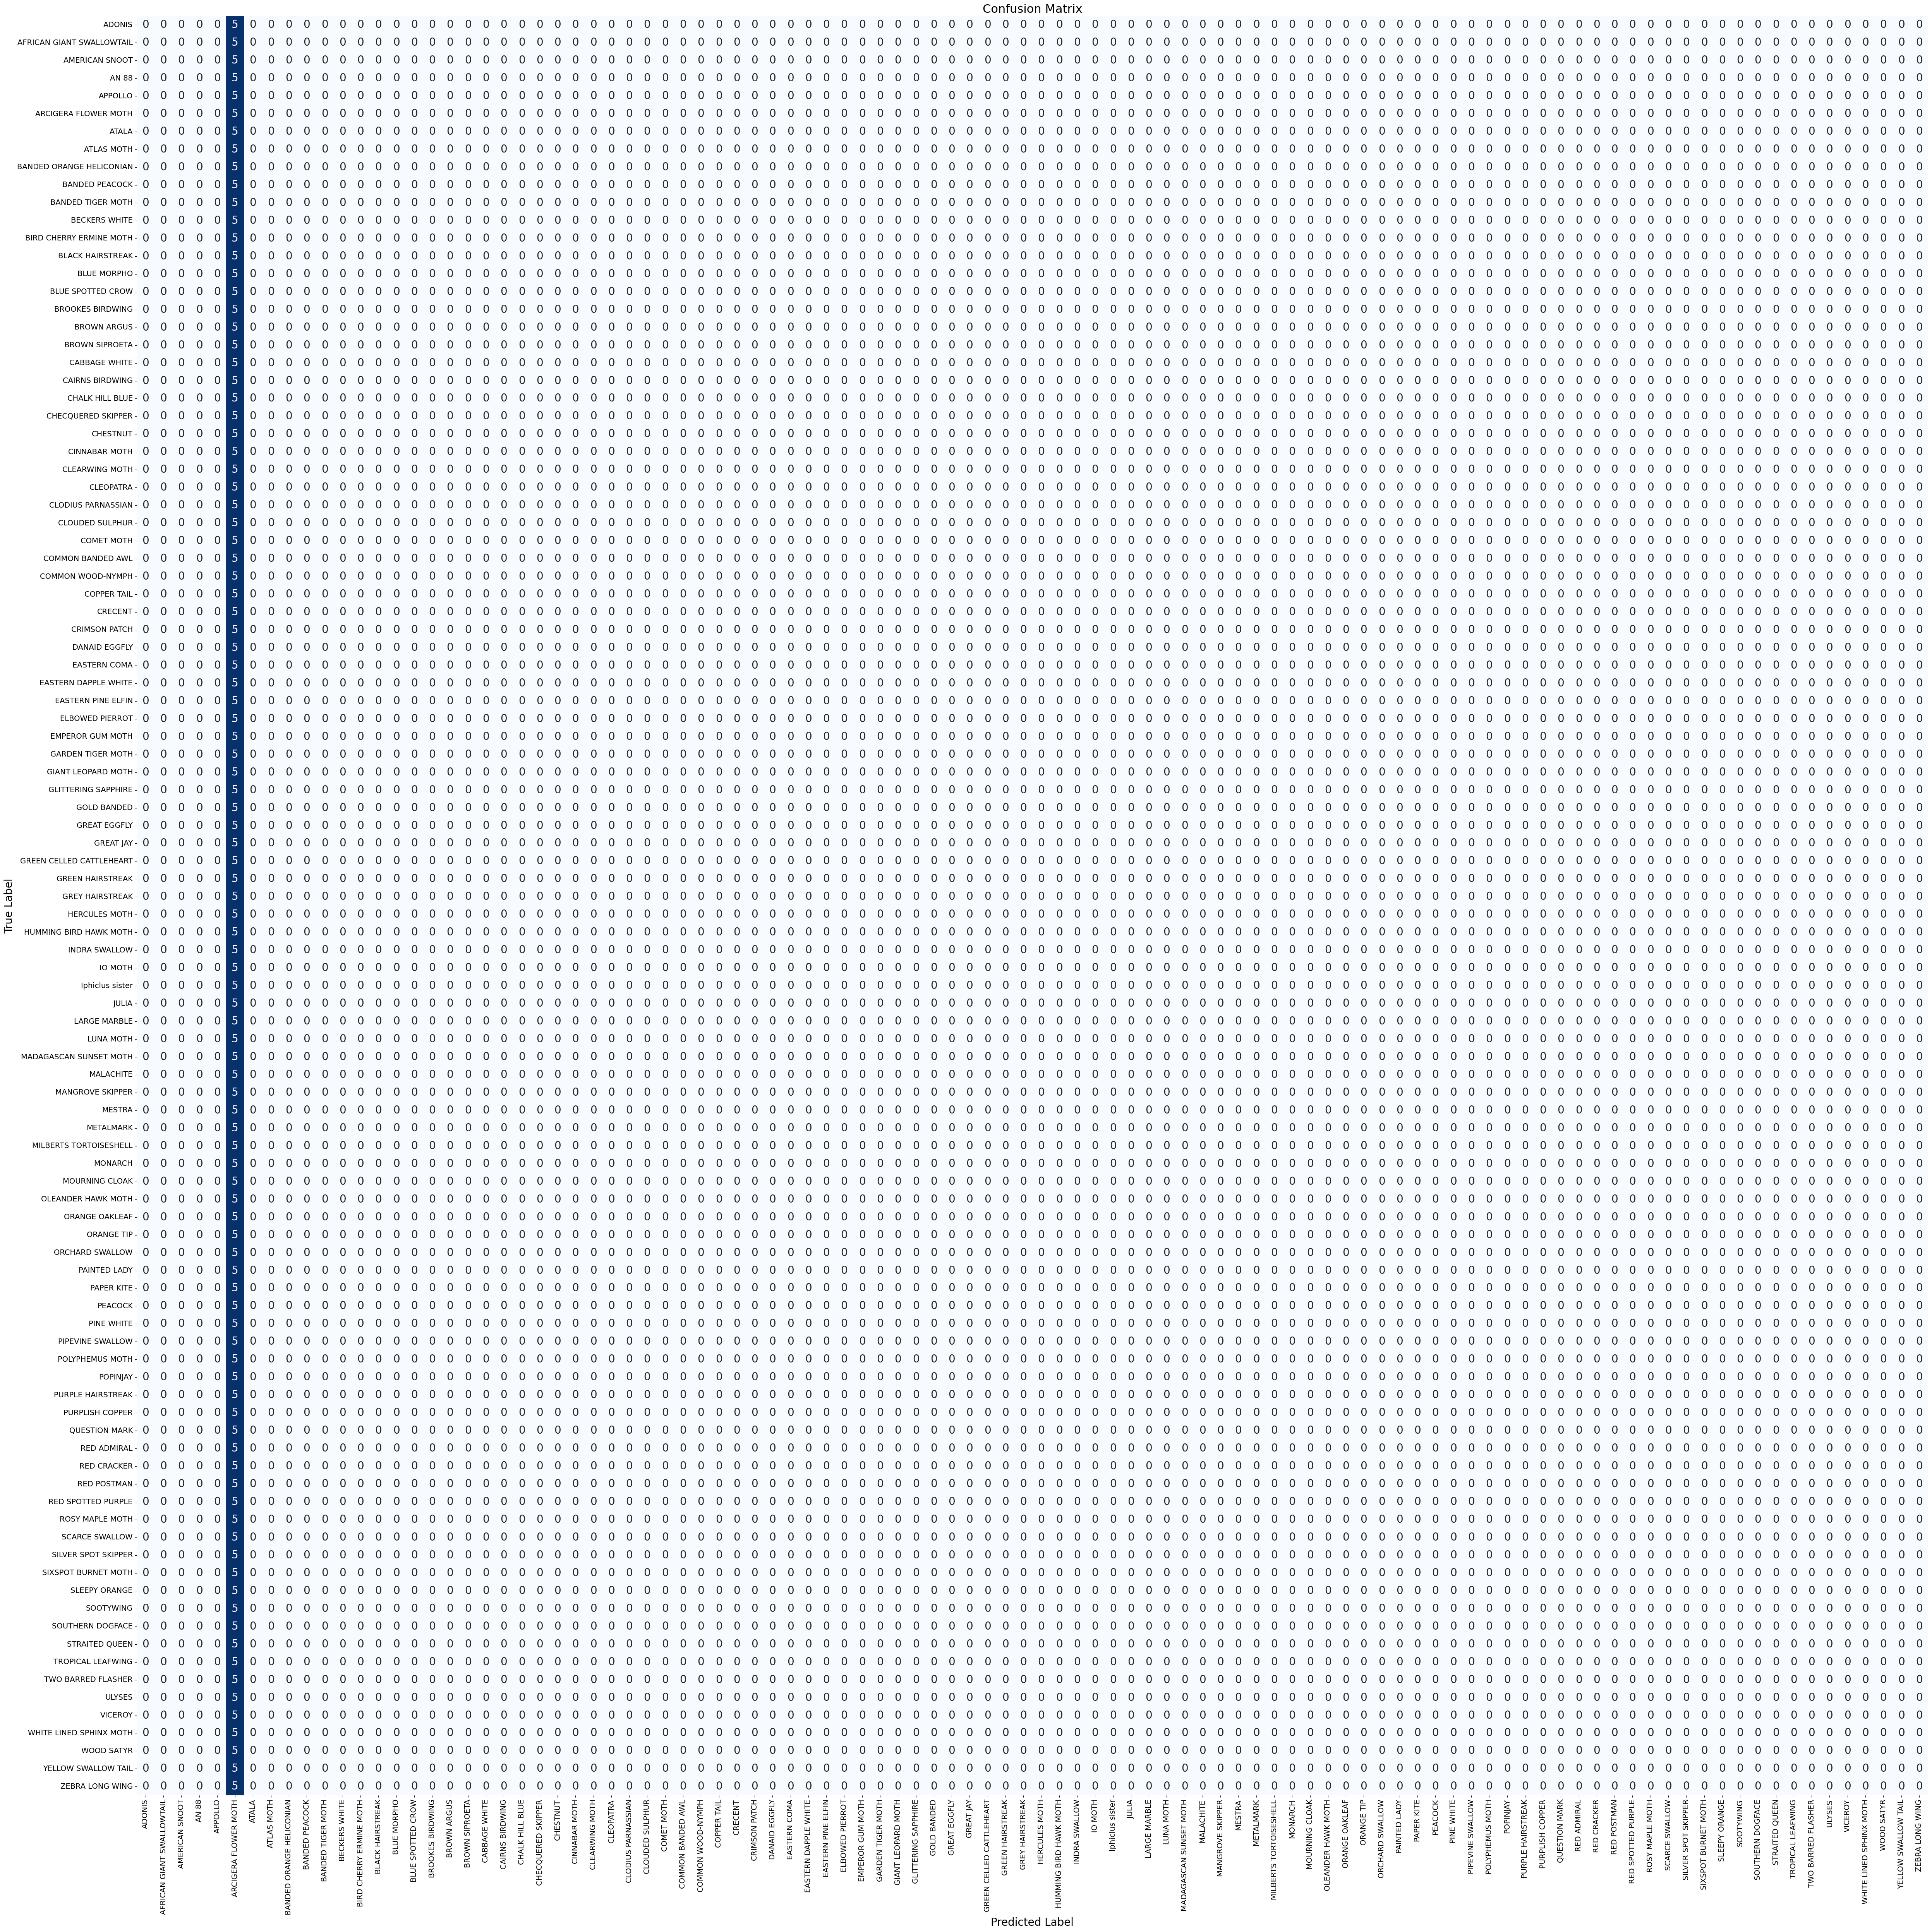

In [86]:
make_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
    classes=class_names,
    figsize=(50, 50),
    text_size=20,
    norm=False
)


In [87]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

                           precision    recall  f1-score   support

                   ADONIS       0.00      0.00      0.00         5
AFRICAN GIANT SWALLOWTAIL       0.00      0.00      0.00         5
           AMERICAN SNOOT       0.00      0.00      0.00         5
                    AN 88       0.00      0.00      0.00         5
                  APPOLLO       0.00      0.00      0.00         5
     ARCIGERA FLOWER MOTH       0.01      1.00      0.02         5
                    ATALA       0.00      0.00      0.00         5
               ATLAS MOTH       0.00      0.00      0.00         5
 BANDED ORANGE HELICONIAN       0.00      0.00      0.00         5
           BANDED PEACOCK       0.00      0.00      0.00         5
        BANDED TIGER MOTH       0.00      0.00      0.00         5
            BECKERS WHITE       0.00      0.00      0.00         5
  BIRD CHERRY ERMINE MOTH       0.00      0.00      0.00         5
         BLACK HAIRSTREAK       0.00      0.00      0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [88]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

f1_df = report_df[['f1-score']].iloc[:len(class_names)].reset_index()
f1_df.columns = ['Class Name', 'F1-score']

print(f1_df)


                   Class Name  F1-score
0                      ADONIS       0.0
1   AFRICAN GIANT SWALLOWTAIL       0.0
2              AMERICAN SNOOT       0.0
3                       AN 88       0.0
4                     APPOLLO       0.0
..                        ...       ...
95                    VICEROY       0.0
96    WHITE LINED SPHINX MOTH       0.0
97                 WOOD SATYR       0.0
98        YELLOW SWALLOW TAIL       0.0
99            ZEBRA LONG WING       0.0

[100 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


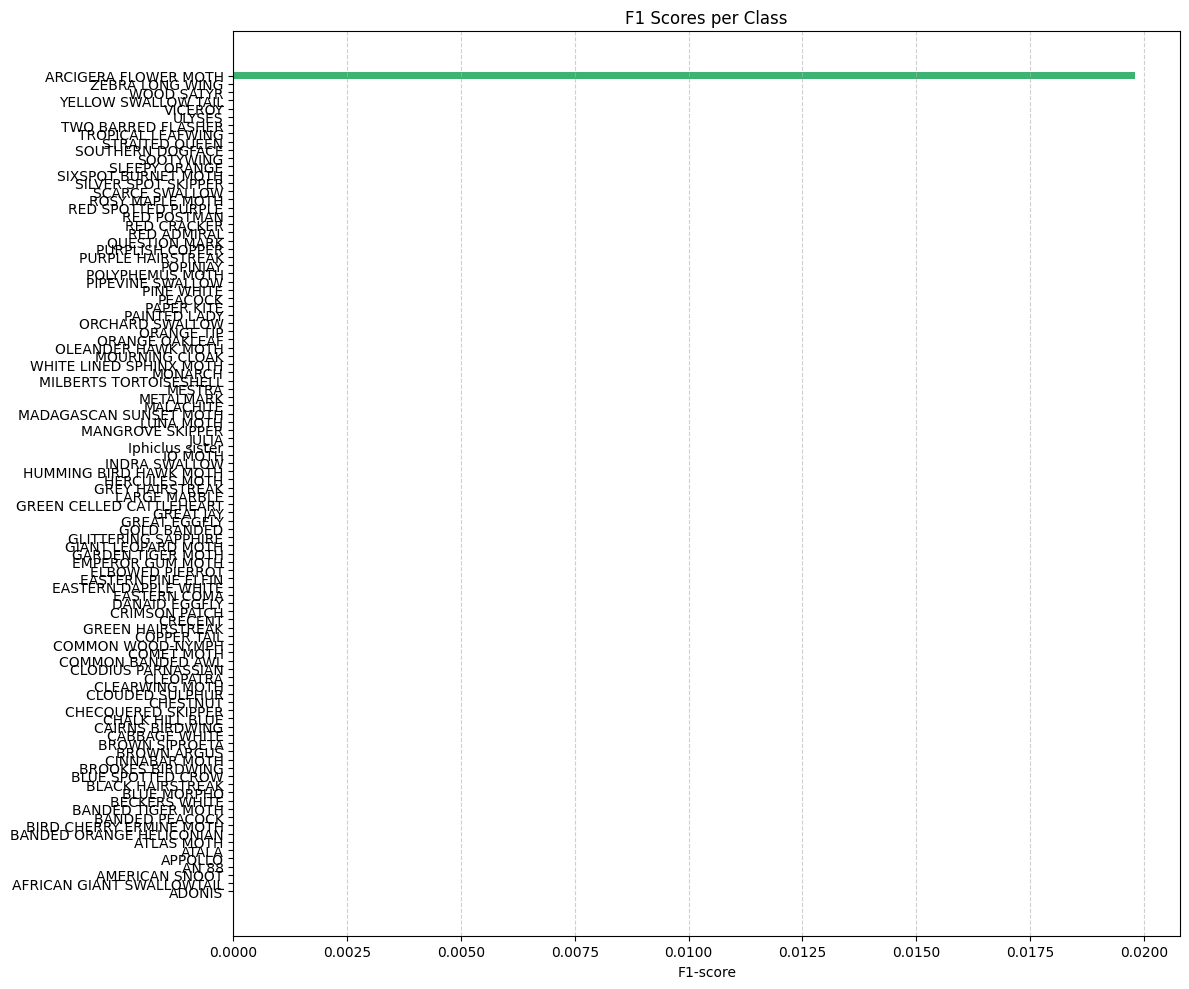

In [89]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

f1_df = pd.DataFrame(report_dict).transpose()
f1_df = f1_df[['f1-score']].iloc[:len(class_names)].reset_index()
f1_df.columns = ['Class Name', 'F1-score']
import matplotlib.pyplot as plt

f1_df = f1_df.sort_values('F1-score', ascending=True)

plt.figure(figsize=(12, 10))
plt.barh(f1_df['Class Name'], f1_df['F1-score'], color='mediumseagreen')
plt.xlabel('F1-score')
plt.title('F1 Scores per Class')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


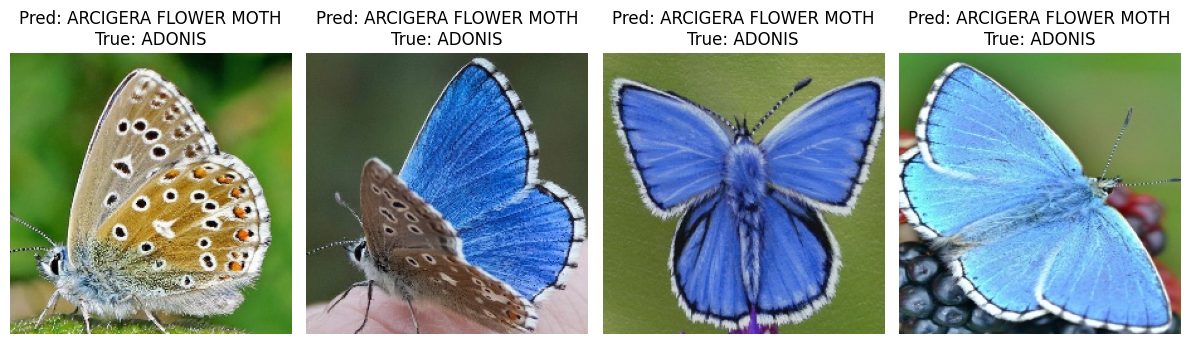

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

file_paths = test_data.filepaths[:4]

plt.figure(figsize=(12, 6))

for i, path in enumerate(file_paths):
    img = load_img(path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    pred = model_1.predict(img_batch)
    pred_class = class_names[np.argmax(pred)]

    true_class = class_names[y_true[i]]


    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_class}\nTrue: {true_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [91]:
wrong_indices = np.where(y_pred != y_true)[0]
print(f"Total wrongly predicted images: {len(wrong_indices)}")


Total wrongly predicted images: 495


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


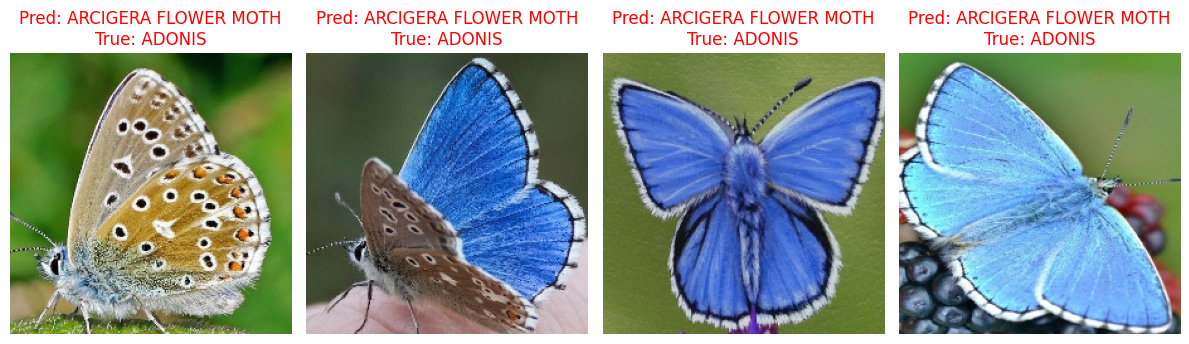

In [92]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

plt.figure(figsize=(12, 6))

for i, idx in enumerate(wrong_indices[:4]):  # Display first 4 misclassified
    img_path = test_data.filepaths[idx]
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model_1.predict(img_batch)
    pred_class = class_names[np.argmax(pred)]
    true_class = class_names[y_true[idx]]

    # Plot
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_class}\nTrue: {true_class}", color="red")
    plt.axis('off')

plt.tight_layout()
plt.show()
